<img src="../../img/ods_stickers.jpg" />

# Открытый курс по машинному обучению. Сессия № 2

# Индивидуальный проект по анализу данных.
# Предсказание наличия у пациента хронической почечной недостаточности
**Автор:** Кудин Степан Сергеевич (kudin.stepan@yandex.ru)

## Задача

### Постановка

Для индивидуального проекта был взят этот <a href="http://archive.ics.uci.edu/ml/datasets/Chronic_Kidney_Disease" target="_blank">датасет</a>. В нём содержатся различные данные о пациентах и информация о том, есть ли у них хроническая почечная недостаточность (ХПН). Задача состоит в том, чтобы на основе представленных данных в датасете научиться предсказывать, болен ли человек ХПН или нет.

Причиной ХПН могут быть множество болезней, некоторые из них, если запустить процесс, приводят к полной деградации функции почек. Есть так же болезни, вызывающие ХПН, которые приводят к отказу почек **гарантировано**. Поэтому чем раньше и проще будет диагностироваться возникновение ХПН, тем больше людей будет спасено от терминальной стадии ХПН, ну или хотя бы функция их почек дойдёт до терминальной стадии за больший срок, что тоже не самый плохой результат.

### Описание данных в датасете

Посмотрим, какие данные есть в датасете.

Признаки:
1. age (численный) -- возраст в годах;
2. bp (численный) -- артериальное давление в мм/рт.ст.
3. sg (категориальный) -- удельная плотность, судя по всему, мочи. Возможные значения -- 1.005, 1.010, 1.015, 1.020, 1.025.
4. al (категориальный) -- альбумин. Возможные значения -- 0, 1, 2, 3, 4, 5.
5. su (категориальный) -- сахар. Возможные значения -- 0, 1, 2, 3, 4, 5.
6. rbc (категориальный) -- красные кровяные тельца. Возможные значения -- normal, abnormal.
7. pc (категориальный) -- гнойные клетки. Возможные значения -- normal, abnormal.
8. pcc (категориальный) -- комки гнойных клеток. Возможные значения -- present, notpresent.
9. ba (категориальный) -- бактерии. Возможные значения -- present, notpresent.
10. bgr (численный) -- случайный тест глюкозы. Этот тест измеряет концентрацию глюкозы в крови в любое время без каких-нибудь предварительных условий (на тощак и т.д.). Яркий пример -- приборы для измерения уровня глюкозы у диабетиков. Измеряется в мг/дл.
11. bu (численный) -- мочевина в крови. Измеряется в мг/дл.
12. sc (численный) -- креатенин в сыворотке. Изменяется в мг/дл.
13. sod (численный) -- натрий. Измеряется в миллиэквивалентах/л.
14. pot (численный) -- калий. Измеряется в миллиэквивалентах/л.
15. hemo (численный) -- гемоглобин. В описании данных указано, что измеряется в gms, но судя по всему, тут опечатка и измеряется в г/мл (возможно, требуется изучить данные :-)).
16. pcv (численный) -- гематокрит (объём упакованных клеток).
17. wc (численный) -- количество белых кровяных клеток. Измеряется в количестве клеток на микролитр.
18. rc (численный) -- количество эритроцитов. Измеряется в миллионах на кубический сантиметр.
19. htn (категориальный) -- гипертония. Возможные значения -- yes, no.
20. dm (категориальный) -- сахарный диабет. Возможные значения -- yes, no.
21. cad (категориальный) -- коронарная недостаточность. Возможные значения -- yes, no.
22. appet (категориальный) -- аппетит. Возможные значения -- good, poor.
23. pe (категориальный) -- отёк ног. Возможные значения -- yes, no.
24. ane (категориальный) -- анемия. Возможные значения -- yes, no.

Целевой признак class является категориальным и имеет два значения ckd (есть ХПН) и notckd (нет ХПН).

## Первичная подготовка данных

Сначала загрузим датасет. Предварительно, я руками сконвертировал его в формат csv (scipy'евский ридер, исходный датасет не смог прочитать).

In [2]:
# Константы.
RANDOM_SEED = 17
PATH_TO_DATASET_FILE = "../../data/chronic_kidney_disease.csv"

In [3]:
import pandas as pd

raw_dataset = pd.read_csv(PATH_TO_DATASET_FILE)

raw_dataset.head()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,class
0,48,80,1.020,1,0,?,normal,notpresent,notpresent,121,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,7,50,1.020,4,0,?,normal,notpresent,notpresent,?,...,38,6000,?,no,no,no,good,no,no,ckd
2,62,80,1.010,2,3,normal,normal,notpresent,notpresent,423,...,31,7500,?,no,yes,no,poor,no,yes,ckd
3,48,70,1.005,4,0,normal,abnormal,present,notpresent,117,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,51,80,1.010,2,0,normal,normal,notpresent,notpresent,106,...,35,7300,4.6,no,no,no,good,no,no,ckd


Размер таблицы:

In [4]:
raw_dataset.shape

(400, 25)

и общая информация о датасете:

In [5]:
raw_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 25 columns):
age      400 non-null object
bp       400 non-null object
sg       400 non-null object
al       400 non-null object
su       400 non-null object
rbc      400 non-null object
pc       400 non-null object
pcc      400 non-null object
ba       400 non-null object
bgr      400 non-null object
bu       400 non-null object
sc       400 non-null object
sod      400 non-null object
pot      400 non-null object
hemo     400 non-null object
pcv      400 non-null object
wc       400 non-null object
rc       400 non-null object
htn      400 non-null object
dm       400 non-null object
cad      400 non-null object
appet    400 non-null object
pe       400 non-null object
ane      400 non-null object
class    400 non-null object
dtypes: object(25)
memory usage: 78.2+ KB


Видно, что пандас при чтении посчитал все признаки объектами. Прежде чем начать анализировать датасет, преобразуем датасет в более удобоваримый формат:
1. заменим строковые значения категориальных признаков на числовые (простое индексирование);
2. заменим знаки вопроса, обозначающие пропуск значения на NaN;
3. приведём все признаки к типу float64.

Поехали:

In [6]:
import numpy as np

fixed_dataset = pd.DataFrame()
passes_filler = lambda x: np.nan if str(x) == "?" else x

numerical_features = ["age", "bp", "bgr", "bu", "sc", "sod", "pot", "hemo", "pcv", "wc", "rc"]
nominal_features = ["sg", "al", "su", "rbc", "pc", "pcc", "ba", "htn", "dm", "cad", "appet", "pe", "ane", "class"]
nominal_features_mapping = [
    {"1.005": 0, "1.010": 1, "1.015": 2, "1.020": 3, "1.025": 4},
    {"0": 0, "1": 1, "2": 2, "3": 3, "4": 4, "5": 5},
    {"0": 0, "1": 1, "2": 2, "3": 3, "4": 4, "5": 5},
    {"normal": 0, "abnormal": 1},
    {"normal": 0, "abnormal": 1},
    {"present": 0, "notpresent": 1},
    {"present": 0, "notpresent": 1},
    {"yes": 0, "no": 1},
    {"yes": 0, "no": 1},
    {"yes": 0, "no": 1},
    {"good": 0, "poor": 1},
    {"yes": 0, "no": 1},
    {"yes": 0, "no": 1},
    {"ckd": 1, "notckd": 0}
]

for feature in numerical_features:
    fixed_dataset[feature] = raw_dataset[feature].map(passes_filler).astype("float64")

for num, feature in enumerate(nominal_features):
    fixed_dataset[feature] = raw_dataset[feature].map(passes_filler).map(nominal_features_mapping[num])

fixed_dataset.head()

,age,bp,bgr,bu,sc,sod,pot,hemo,pcv,wc,...,pc,pcc,ba,htn,dm,cad,appet,pe,ane,class
0,48.0,80.0,121.0,36.0,1.2,NaN,NaN,15.4,44.0,7800.0,...,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,1
1,7.0,50.0,NaN,18.0,0.8,NaN,NaN,11.3,38.0,6000.0,...,0.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1
2,62.0,80.0,423.0,53.0,1.8,NaN,NaN,9.6,31.0,7500.0,...,0.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,1
3,48.0,70.0,117.0,56.0,3.8,111.0,2.5,11.2,32.0,6700.0,...,1.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,1
4,51.0,80.0,106.0,26.0,1.4,NaN,NaN,11.6,35.0,7300.0,...,0.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1


Теперь в raw_dataset лежат данные в том виде, с которым можно работать.

## Первичный анализ датасета

Пришло время внимательно посмотреть на данные. Для начала посмотрим на отношения классов, для этого нарисуем гистограмму, заодно импортируем библиотеки для рисования и настроим их:

In [7]:
import pylab as plt
%matplotlib inline

import seaborn as sns
from matplotlib import pyplot as plt

plt.rcParams["figure.figsize"] = (10, 8)

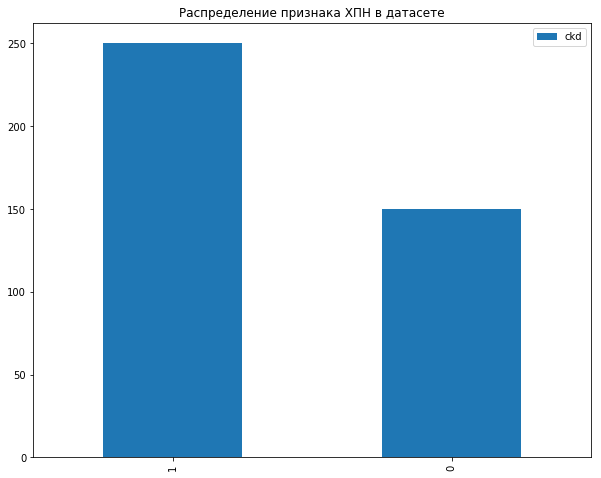

In [8]:
fixed_dataset["class"].value_counts().plot(kind="bar", label="ckd")
plt.legend()
plt.title("Распределение признака ХПН в датасете");

Видно, что классы не сбалансированы, людей с ХПН в датасете больше, чем без него, но соотношение мощности классов меньше двух, иными словами данных о больных ХПН в датасете не подавляющее большинство.

Теперь посмотрим статистику по нашим числовым данным, попробуем понять, на сколько чистые данные у нас в наличии.

In [9]:
fixed_dataset.describe()

,age,bp,bgr,bu,sc,sod,pot,hemo,pcv,wc,...,pc,pcc,ba,htn,dm,cad,appet,pe,ane,class
count,391.000000,388.000000,356.000000,381.000000,383.000000,313.000000,312.000000,348.000000,329.000000,294.000000,...,335.000000,396.000000,396.000000,398.000000,397.000000,398.000000,399.000000,399.000000,399.000000,400.000000
mean,51.483376,76.469072,148.036517,57.425722,3.072454,137.528754,4.627244,12.526437,38.884498,8406.122449,...,0.226866,0.893939,0.944444,0.630653,0.657431,0.914573,0.205514,0.809524,0.849624,0.625000
std,17.169714,13.683637,79.281714,50.503006,5.741126,10.408752,3.193904,2.912587,8.990105,2944.474190,...,0.419431,0.308305,0.229351,0.483235,0.475168,0.279868,0.404584,0.393170,0.357888,0.484729
min,2.000000,50.000000,22.000000,1.500000,0.400000,4.500000,2.500000,3.100000,9.000000,2200.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,42.000000,70.000000,99.000000,27.000000,0.900000,135.000000,3.800000,10.300000,32.000000,6500.000000,...,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000
50%,55.000000,80.000000,121.000000,42.000000,1.300000,138.000000,4.400000,12.650000,40.000000,8000.000000,...,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000
75%,64.500000,80.000000,163.000000,66.000000,2.800000,142.000000,4.900000,15.000000,45.000000,9800.000000,...,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000
max,90.000000,180.000000,490.000000,391.000000,76.000000,163.000000,47.000000,17.800000,54.000000,26400.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


В описании датасета написано, что данные реальные, правдоподобность большинства значений признаков, мне, как не специалисту оценить крайне затруднительно. В целом, я думаю, что надо оставить все данные, даже не смотря на то, что минимальный возраст пациента 2 года, увы, ХПН бывает и в таком возрасте. К тому же, экстремальные значения признака скорее всего будет говорить о наличии какой-либо паталогии.

Прежде чем пытаться дальше анализировать данные нужно обработать пропущенные значения в датасете. Поскольку, в теории, может быть пропущен любой признак, кроме целевого, то, будут обработаны как категориальные признаки, так и численные.

Пропуски в численных признаках попробую заместить средним значением. Поэтому деление на тренировочную и тестовую выборку я выполню сейчас, чтобы не использовать данные из теста для подсчёта среднего по признаку. Разбиение будет стратифицированным, чтобы распределения целевого признака на тренировочном и тестовом датасете были одинаковы. На тестовую часть будет выделено 25% датасета.

In [10]:
y_tmp = fixed_dataset["class"].copy(deep=True)
X_tmp = fixed_dataset.copy(deep=True).drop("class", axis=1)

from sklearn.model_selection import StratifiedShuffleSplit

sss = StratifiedShuffleSplit(n_splits=1, test_size=0.25, random_state=RANDOM_SEED)
train_index, test_index = tuple(sss.split(X_tmp, y_tmp))[0]

train = fixed_dataset.iloc[train_index]
test = fixed_dataset.iloc[test_index]

На всякий случай проверю, что распределения целевого признака на тестовой и тренировочной выборках примерно одинаковы.

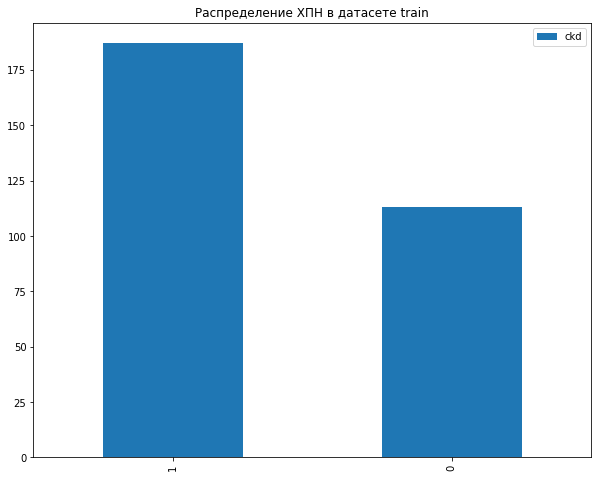

In [11]:
train["class"].value_counts().plot(kind="bar", label="ckd")
plt.legend()
plt.title("Распределение ХПН в датасете train");

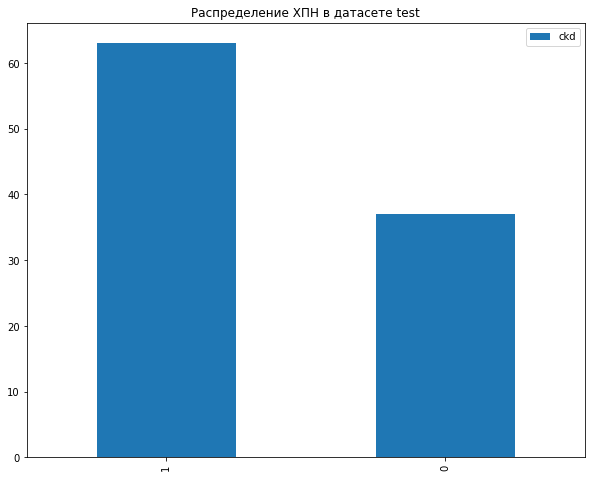

In [12]:
test["class"].value_counts().plot(kind="bar", label="ckd")
plt.legend()
plt.title("Распределение ХПН в датасете test");

Действительно, то что надо.

Теперь, заполним пропуски в данных. Для численных признаков я попробую использовать среднее. В категориальные признаки же введу ещё одно значение, обозначающее то, что признак отсутствует.

In [13]:
dataset = fixed_dataset.copy(deep=True)

# Обработка численных признаков.
numerical_features_mean = []
for feature in numerical_features:
    mean_val = train[feature].mean()
    numerical_features_mean.append(mean_val)
    train[feature].fillna(mean_val, inplace=True)
    test[feature].fillna(mean_val, inplace=True)
    dataset[feature].fillna(mean_val, inplace=True)
    
# Обработка категориальных признаков.
# У этого списка признаков только два значения.
cutted_nominal_features = ["rbc", "pc", "pcc", "ba", "htn", "dm", "cad", "appet", "pe", "ane"]
for feature in cutted_nominal_features:
    train[feature].fillna(2, inplace=True)
    test[feature].fillna(2, inplace=True)
    dataset[feature].fillna(2, inplace=True)

# Оставшиеся обработаю отдельно.
# "sg", "al", "su"
train["sg"].fillna(5, inplace=True)
test["sg"].fillna(5, inplace=True)
dataset["sg"].fillna(5, inplace=True)

train["al"].fillna(6, inplace=True)
test["al"].fillna(6, inplace=True)
dataset["al"].fillna(6, inplace=True)

train["su"].fillna(6, inplace=True)
test["su"].fillna(6, inplace=True)
dataset["su"].fillna(6, inplace=True)

dataset.head()

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\generic.py:3660: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


,age,bp,bgr,bu,sc,sod,pot,hemo,pcv,wc,...,pc,pcc,ba,htn,dm,cad,appet,pe,ane,class
0,48.0,80.0,121.000000,36.0,1.2,137.267635,4.714167,15.4,44.0,7800.0,...,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,1
1,7.0,50.0,150.947761,18.0,0.8,137.267635,4.714167,11.3,38.0,6000.0,...,0.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1
2,62.0,80.0,423.000000,53.0,1.8,137.267635,4.714167,9.6,31.0,7500.0,...,0.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,1
3,48.0,70.0,117.000000,56.0,3.8,111.000000,2.500000,11.2,32.0,6700.0,...,1.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,1
4,51.0,80.0,106.000000,26.0,1.4,137.267635,4.714167,11.6,35.0,7300.0,...,0.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1


Для удобства сконвертируем значения категориальных признаков в целые числа.

In [14]:
for feature in nominal_features:
    train[feature] = train[feature].astype("int8")
    test[feature] = test[feature].astype("int8")
    dataset[feature] = dataset[feature].astype("int8")

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


Отлично, теперь у нас есть датасет без пропусков. Давайте посмотрим на значения, которые принимают наши категориальные признаки в тренировочной части датасета.

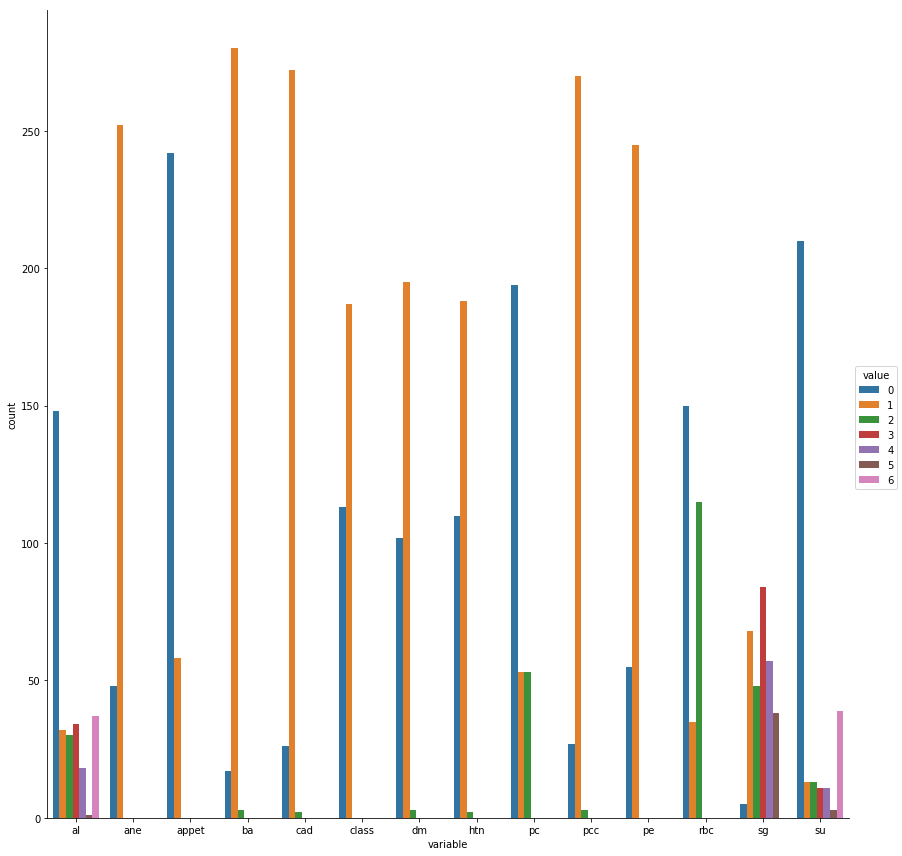

In [15]:
train_uniques = pd.melt(frame=train, value_vars=nominal_features)
train_uniques = pd.DataFrame(train_uniques.groupby(["variable", "value"])["value"].count()) \
    .sort_index(level=[0, 1]) \
    .rename(columns={"value": "count"}) \
    .reset_index()
    
sns.factorplot(x="variable", y="count", hue="value", data=train_uniques, kind="bar", size=12);

Из графика видно, что почти у всех категориальных признаков есть доминирующее значение, а так же видно, что у некоторых признаков очень много пропусков, возможно, их не стоит учитывать при постоении модели. Давайте посмотрим на численную статистику по уникальным значениям у категориальных признаков:

In [16]:
for feature in nominal_features:
    n = train[feature].nunique()
    print("Feature: %s" % feature)
    print(n, sorted(train[feature].value_counts().to_dict().items()))
    print(10 * "-")

Feature: sg
6 [(0, 5), (1, 68), (2, 48), (3, 84), (4, 57), (5, 38)]
----------
Feature: al
7 [(0, 148), (1, 32), (2, 30), (3, 34), (4, 18), (5, 1), (6, 37)]
----------
Feature: su
7 [(0, 210), (1, 13), (2, 13), (3, 11), (4, 11), (5, 3), (6, 39)]
----------
Feature: rbc
3 [(0, 150), (1, 35), (2, 115)]
----------
Feature: pc
3 [(0, 194), (1, 53), (2, 53)]
----------
Feature: pcc
3 [(0, 27), (1, 270), (2, 3)]
----------
Feature: ba
3 [(0, 17), (1, 280), (2, 3)]
----------
Feature: htn
3 [(0, 110), (1, 188), (2, 2)]
----------
Feature: dm
3 [(0, 102), (1, 195), (2, 3)]
----------
Feature: cad
3 [(0, 26), (1, 272), (2, 2)]
----------
Feature: appet
2 [(0, 242), (1, 58)]
----------
Feature: pe
2 [(0, 55), (1, 245)]
----------
Feature: ane
2 [(0, 48), (1, 252)]
----------
Feature: class
2 [(0, 113), (1, 187)]
----------


Эту статистику будем использовать в дальнейшем, если понадобится.

Давайте разобьём категориальные элементы датасета по значениям целевого признака. Возможно, это покажет нам самые важные признаки.

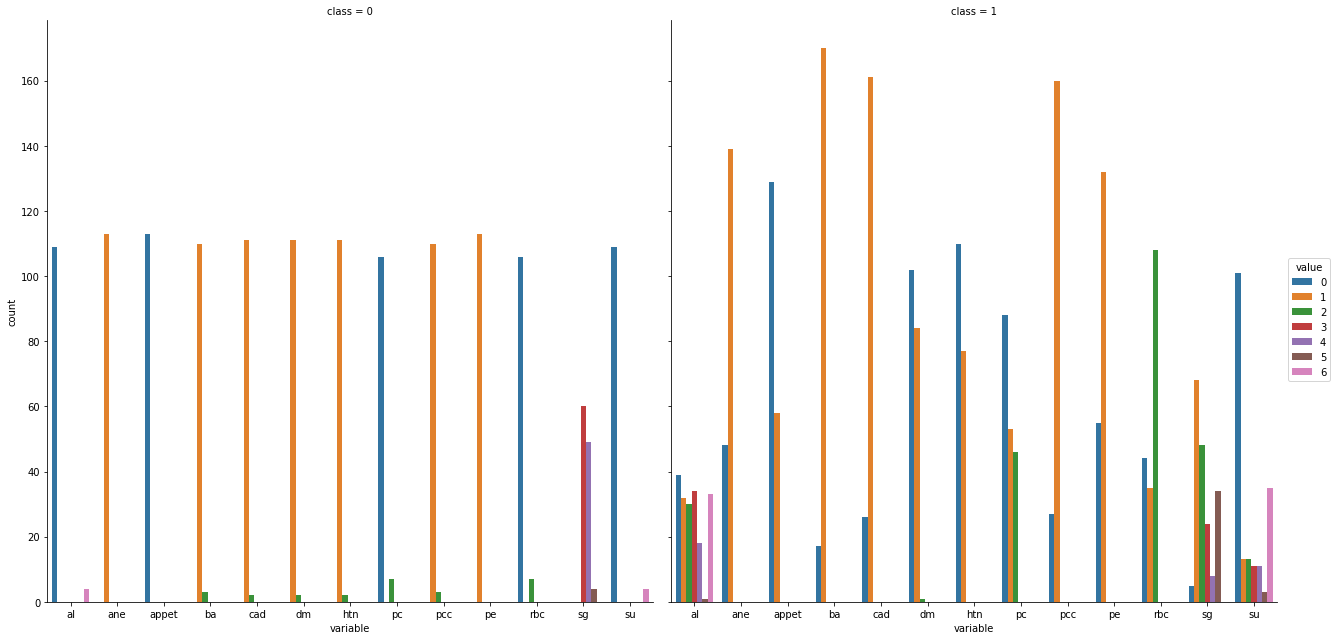

In [17]:
train_uniques = pd.melt(frame=train, value_vars=nominal_features[:-1], id_vars=["class"])
train_uniques = pd.DataFrame(train_uniques.groupby(["variable", "value", "class"])["value"].count()) \
    .sort_index(level=[0, 1]) \
    .rename(columns={"value": "count"}) \
    .reset_index()
    
sns.factorplot(x="variable", y="count", hue="value", 
               col="class", data=train_uniques, kind="bar", size=9);

Видно, что при отсутствии ХПН при наличии значения альбумина (al) он принимает только нулевое значение. Так же, если нет ХПН, то и значение анемии (ane) нет. Только при наличии ХПН пропадает аппетит (appet). Подобное можно написать про **все** категориальные признаки, в каждом есть значения, которые встречаются в одном классе и почти или вообще не встречаются в другом классе.

Это выглядит абсолютно логичным, можно предположить, что значения, которые в основном встречаются только при наличии ХПН являются не нормальными.

Например, гипертония, у тех у кого нет ХПН её нет в тренировочной выборке. Это объясняется тем, одной из причин гипертонии (это значит, что у человека повышенное артериальное давление) с одной стороны могут являться болезни почек, из-за того, что скорость фильтрации почек падает (СКФ - скорость клубочковой фильтрации, клубочек - структурная единица почки, выполняющаяя фильтрационную функцию) и организм пытается компенсировать это повышением артериального давления, что скорость фильтрации увеличивает и ускоряет деградацию функции почки. С другой стороны, гипертония, вызванная другими причинами негативно влияет на почку, разрушая её структурные единицы.T ак же при ХПН может появляться отсутствие аппетита и так далее и тому подобное. В общем очень тяжёлое заболевание, поэтому то, что все категориальные признаки являются достаточно сильными по медицинским причинам.

Теперь попробуем проанализировать численные признаки. Наприсуем boxplot'ы, описывающее статистики распределения количественных признаков в двух группах: у кого нет ХПН и у кого оно есть.

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


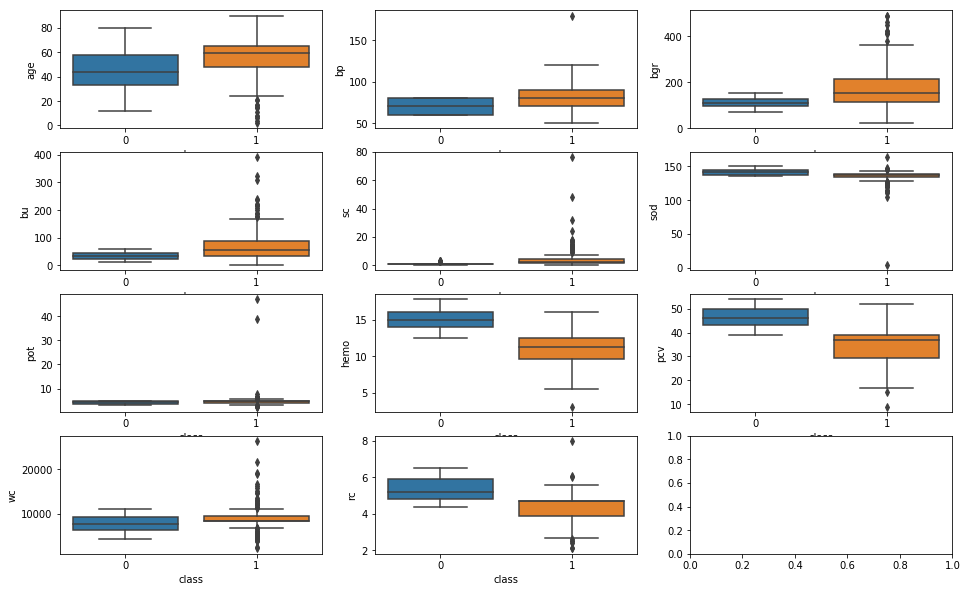

In [18]:
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(16, 10))

for index, feature in  enumerate(numerical_features):
    sns.boxplot(x="class", y=feature, data=train, ax=axes[int(index / 3), index % 3])
    axes[int(index / 3), index % 3].legend()
    axes[int(index / 3), index % 3].set_xlabel("class")
    axes[int(index / 3), index % 3].set_ylabel(feature);

На глаз, наибольшие различия у признаков hemo (гемоглобин), pcv (гематокрит), rc (количество эритроцитов), age (возраст). Логично, при ХПН деградируют все функции почки, в том числе её функция при создании гемоглобина в крови. Гематокрит и количество эритроцитов тоже снижаются. Возраст важен потому, что болезнь чаще встречается у людей старше 30. Скорее всего это сильные признаки.

Так же, хочу обратить внимание на признаки bu (мочевина) и sc (креатенит), не смотря на то что они довольно мелко отрисовались, особенно креатенин, если присмотреться дожно быть видно довольно сильное отличие при разных значениях класса, связано это с тем, что мочевина и креатенин являются азотистыми шлаками, вырабатывающимися при жизнидеятельности человека и их выводом занимаются почки. Чем большая степень ХПН, тем хуже они фильтруют и тем больше концентация азотистых шлаков в крови. Скорее всего, они тоже будут сильными признаками.

И последнее, изучим корреляцию между количественными признаками.

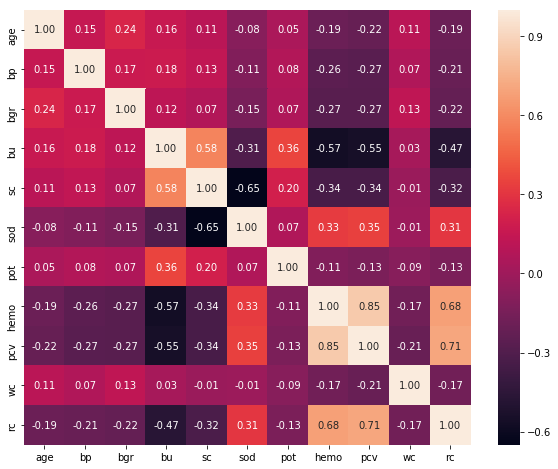

In [19]:
corr_matrix = train.drop(nominal_features, axis=1).corr()
sns.heatmap(corr_matrix, annot=True, fmt=".2f");

Используя таблицу Чеддока, получаем, что между собой сильно коррелируют (модуль больше или равен 0.7) признаки pcv и hemo, rc и pcv, заметно коррелируют (модуль от 0.5 до 0.7 не включая) sc и bu, sod и sc, hemo и bu, pcv и bu, rc и hemo, умеренно (модуль от 0.3 до 0.5 не включая) sod и bu, pot и bu, hemo и sc, hemo и sod, pcv и sc, pcv и sod, rc и sc, rc и sod. Корреляции сильные и заметные корреляции объясняются медицинскими причинами.

Используем эту информацию при создании модели.

## Построение модели

Поскольку задача медицинская, крайне необходимо, чтобы алгоритм легко интерпретировался. Поэтому будет строиться дерево решений. В качестве метрики качества я выбираю F1 меру, поскольку, не смотря на то, что нужна как можно большая полнота (мы должны пропускать как можно меньше больных людей), нам нужен баланс с точностью, иначе константное решение будет оптимальным, но мы не хотим проводить дополнительные обследования для подтверждения наличия ХПН всем подряд (в первую очередь измерять СКФ).

Сначала окончательно подготовим датасет для тренировки моделей. Сделаем dummy кодирование для категориальных признаков и выкинем из выборки по одному признаку из сильно коррелирующие пар. Нормировать данные не надо, поскольку это не нужно для применения алгоритма решающего дерева.

In [20]:
def get_datasets(df, train_index, test_index, numerical_features, nominal_features):
    X_train = pd.DataFrame()
    y_train = pd.DataFrame()

    X_test = pd.DataFrame()
    y_test = pd.DataFrame()

    # Сначала добавим количественные признаки.
    for feature in numerical_features:
        X_train[feature] = train[feature]
        X_test[feature] = test[feature]

    # dummy кодирование категориальных признаков.
    for feature in nominal_features:
        X_train = pd.concat([X_train, pd.get_dummies(df[feature], feature).iloc[train_index]], axis=1)
        X_test = pd.concat([X_test, pd.get_dummies(df[feature], feature).iloc[test_index]], axis=1)

    y_train = df["class"].iloc[train_index].copy(deep=True)
    y_test = df["class"].iloc[test_index].copy(deep=True)
    
    return X_train, X_test, y_train, y_test
    

clean_numerical_features = ["age", "bp", "bgr", "bu", "sc", "sod", "pot", "hemo", "pcv", "wc", "rc"]
clean_nominal_features = ["sg", "al", "su", "rbc", "pc", "pcc", "ba", "htn", "dm", "cad", "appet", "pe", "ane"]

X_train, X_test, y_train, y_test = get_datasets(dataset, train_index, test_index, clean_numerical_features,
                                                clean_nominal_features)

С помощью кросс валидации найдём оптимальную глубину дерева. Количество фолдов будет равно 3, поскольку данных очень мало.

In [21]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV


tree_params = {"max_depth": list(range(2, 11))}

tree = DecisionTreeClassifier(random_state=RANDOM_SEED)
gscv = GridSearchCV(tree, tree_params, scoring="f1", cv=3, n_jobs=-1, verbose=True)
gscv.fit(X_train, y_train)

Fitting 3 folds for each of 9 candidates, totalling 27 fits


[Parallel(n_jobs=-1)]: Done  27 out of  27 | elapsed:   24.5s finished


GridSearchCV(cv=3, error_score='raise',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=17,
            splitter='best'),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='f1', verbose=True)

Какая оценка F1 score у нас получилась?

In [22]:
gscv.best_score_

0.95856886946593434

Выглядит очень хорошо. Проверим результат на тестовой выборке.

In [23]:
from sklearn.metrics import f1_score, accuracy_score

def evaluate_model(model, X_text, y_test):
    y_test_pred = model.predict(X_test)

    base_test_f1_score = f1_score(y_test, y_test_pred)
    base_accuracy_score = accuracy_score(y_test, y_test_pred)

    print("Test F1 score: %f" % base_test_f1_score)
    print("Test accuracy score: %f" % base_accuracy_score)

evaluate_model(gscv.best_estimator_, X_test, y_test)

Test F1 score: 0.983871
Test accuracy score: 0.980000


Результ просто отличный!

Надо понимать, что для того чтобы получить такой результат мы используем очень много признаков, а значит нужно много анализов и исследований. Давайте попробуем сократить количество признаков и не потерять существенно в качестве. Можно вспомнить, что у нас есть числовые признаки, на которых распределения значений сильно различаются на тренировочной и тестовой выборке, а так же то, что у нас есть категориальные признаки, в которых много пропусков. Давайте возьмём только самые существенные числовые признаки (учитывая корреляци, естественно) и те категориальные, в которых мало пропусков и обучим новую модель.

In [24]:
clean_numerical_features = ["age", "bu", "sc", "hemo", "rc"]
clean_nominal_features = ["pcc", "ba", "htn", "dm", "cad", "appet", "pe", "ane"]

X_train, X_test, y_train, y_test = get_datasets(dataset, train_index, test_index, clean_numerical_features,
                                                clean_nominal_features)

In [25]:
tree_params = {"max_depth": list(range(2, 11))}

tree = DecisionTreeClassifier(random_state=RANDOM_SEED)
gscv = GridSearchCV(tree, tree_params, scoring="f1", cv=3, n_jobs=-1, verbose=True)
gscv.fit(X_train, y_train)

Fitting 3 folds for each of 9 candidates, totalling 27 fits


[Parallel(n_jobs=-1)]: Done  27 out of  27 | elapsed:   24.7s finished


GridSearchCV(cv=3, error_score='raise',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=17,
            splitter='best'),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='f1', verbose=True)

Результат модели:

In [26]:
gscv.best_score_

0.95626349753801432

И результат на тестовом датасете:

In [27]:
evaluate_model(gscv.best_estimator_, X_test, y_test)

Test F1 score: 0.976000
Test accuracy score: 0.970000


Видно, что результат стал чуть хуже, зато мы избавились от кучи параметров. Уменьшим количество признаков ещё сильнее. Используем численные признаки из предыдущей модели, поскольку если креатенин высокий, то и мочевина скорее всего тоже, за исключением мочевины, а из категориальных оставим только гипертонию и сахарный диабет, поскольку это группы риска для ХПН, и аппетит и отёки ног, поскольку легко диагностируются и при ХПН встречаются довольно часто.

In [28]:
clean_numerical_features = ["age", "hemo", "rc", "sc"]
clean_nominal_features = ["dm", "htn", "appet", "pe"]

X_train, X_test, y_train, y_test = get_datasets(dataset, train_index, test_index, clean_numerical_features,
                                                clean_nominal_features)

In [29]:
tree_params = {"max_depth": list(range(2, 11))}

tree = DecisionTreeClassifier(random_state=RANDOM_SEED)
gscv = GridSearchCV(tree, tree_params, scoring="f1", cv=3, n_jobs=-1, verbose=True)
gscv.fit(X_train, y_train)

Fitting 3 folds for each of 9 candidates, totalling 27 fits


[Parallel(n_jobs=-1)]: Done  27 out of  27 | elapsed:   24.0s finished


GridSearchCV(cv=3, error_score='raise',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=17,
            splitter='best'),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='f1', verbose=True)

Оценка качества модели на кросс-валидации:

In [30]:
gscv.best_score_

0.96406790342274218

Оценка качества на тестовой выборке:

In [31]:
evaluate_model(gscv.best_estimator_, X_test, y_test)

Test F1 score: 0.975610
Test accuracy score: 0.970000


Качество осталось примерно таким же, при этом с очень высоким качеством мы определяем наличие ХПН в два анализа крови -- общий, чтобы получить гемоглобин и эритроциты, и биохимический -- для того чтобы получить креатенин, при учёте двух групп риска -- гипертоники и больные сахарным диабетом, а так же используя два крайне легко диагностируемых самостоятельно признака -- отсутствие аппетита и отёки ног.

Отсутствие аппетита и отёк ног - одно из возможных следствий ХПН. Давайте, сделаем признак possible_consequence_of_disease, который будет иметь значение 1, если у нас есть хотя бы одино из этих следствий присутствует у пациета, 0, если отсутствуют оба.

Так же, при ХПН креатенин всегда выше нормы, поэтому попробуем обойтись без общего анализа крови и возьмём только биохимию на креатенин у пациета.

Также сделаем признак risk_group, его значение будет равно 1, если у пациента есть сахарный диабет и/или гипертония, и 0, если их нет.

In [32]:
clean_numerical_features = ["age", "sc"]
clean_nominal_features = []

X_train, X_test, y_train, y_test = get_datasets(dataset, train_index, test_index, clean_numerical_features,
                                                clean_nominal_features)

tmp_1 = dataset["appet"].map({0: 1, 1: 0, 2: 2})
tmp_2 = dataset["pe"].map({0: 1, 1: 0, 2: 2})
tmp = pd.Series([tmp_1[index] or tmp_2[index] for index in range(tmp_1.shape[0])])
features = pd.get_dummies(tmp, "pcd")

X_train = pd.concat([X_train, features.iloc[train_index].copy(deep=True)], axis=1)
X_test = pd.concat([X_test, features.iloc[test_index].copy(deep=True)], axis=1)


tmp_1 = dataset["dm"].map({0: 1, 1: 0, 2: 2})
tmp_2 = dataset["htn"].map({0: 1, 1: 0, 2: 2})
tmp = pd.Series([tmp_1[index] or tmp_2[index] for index in range(tmp_1.shape[0])])
features = pd.get_dummies(tmp, "risk_group")

X_train = pd.concat([X_train, features.iloc[train_index].copy(deep=True)], axis=1)
X_test = pd.concat([X_test, features.iloc[test_index].copy(deep=True)], axis=1)

In [33]:
tree_params = {"max_depth": list(range(2, 11))}

tree = DecisionTreeClassifier(random_state=RANDOM_SEED)
gscv = GridSearchCV(tree, tree_params, scoring="f1", cv=3, n_jobs=-1, verbose=True)
gscv.fit(X_train, y_train)

Fitting 3 folds for each of 9 candidates, totalling 27 fits


[Parallel(n_jobs=-1)]: Done  27 out of  27 | elapsed:   24.5s finished


GridSearchCV(cv=3, error_score='raise',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=17,
            splitter='best'),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='f1', verbose=True)

Оценка качества модели на кросс-валидации:

In [34]:
gscv.best_score_

0.93543301519971711

Оценка качества на тестовой выборке:

In [35]:
evaluate_model(gscv.best_estimator_, X_test, y_test)

Test F1 score: 0.975610
Test accuracy score: 0.970000


Качество на тестовой выборке осталось таким же. В итоге мы получили очень простой классификатор, с очень хорошим качеством предсказания. По сути, для определения с очень высокой вероятностью есть ли у человека ХПН на нужно знать возраст человека, креатенин крови по биохимии, входит ли он в группу риска и есть ли у него возможные наблюдаемые следствия.

## Достаточно ли данных и можно ли улучшить модель

Интуитивно - у нас очень мало данных, всего о 400 пациентах, при этом 100 ушло в тестовую выборку. Как минимум для теста нужно сильно больше данных. Так же у нас есть заметный перекос в сторону больных ХПН людей, что вполне может сказываться на качестве модели, ведь в реальности, к счастью, ХПН встречается не часто, у большинства людей его нет.

Давайте исследуем последнюю модель на предмет улучшения качества и построим кривые валидации.

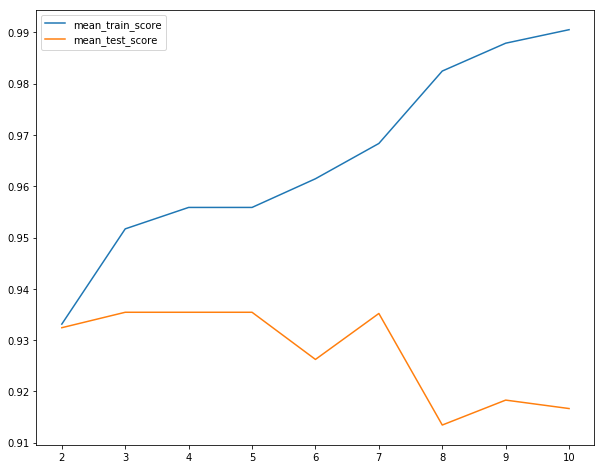

In [36]:
cv_results = pd.DataFrame(gscv.cv_results_)

plt.plot(cv_results["param_max_depth"], cv_results["mean_train_score"], label="mean_train_score")
plt.plot(cv_results["param_max_depth"], cv_results["mean_test_score"], label="mean_test_score")
plt.legend(loc="best")

Посмотрим, какая у нас глубина у результата:

In [37]:
gscv.best_params_

{'max_depth': 3}

По кривым валидации видно, что модель почти сразу началась переобучаться, в смысле получения наилучшего результата мы получили наилучший результат.

In [38]:
# Сохраним наилучшую модель.
best_model = gscv.best_estimator_

Построим кривые обучения, чтобы понять, достаточно ли данных.

In [39]:
# Проценты от обучающей выборки для разделения.
split_percents = [index / 10 for index in range(1, 9)]
test_scores = []
train_scores = []

for split_percent in split_percents:
    sss = StratifiedShuffleSplit(n_splits=1, test_size=split_percent, random_state=RANDOM_SEED)
    train_index, _ = tuple(sss.split(X_train, y_train))[0]
    X_train_tmp = X_train.iloc[train_index].copy(deep=True)
    y_train_tmp = y_train.iloc[train_index].copy(deep=True)
    
    tree_params = {"max_depth": list(range(2, 10))}

    tree_2 = DecisionTreeClassifier(random_state=RANDOM_SEED)
    gscv_2 = GridSearchCV(tree_2, tree_params, scoring="f1", cv=3, n_jobs=-1, verbose=True)
    gscv_2.fit(X_train_tmp, y_train_tmp)
    
    test_score = gscv_2.best_score_
    train_score = f1_score(y_train_tmp, gscv_2.best_estimator_.predict(X_train_tmp))
    
    test_scores.append(test_score)
    train_scores.append(train_score)  

Fitting 3 folds for each of 8 candidates, totalling 24 fits


[Parallel(n_jobs=-1)]: Done  24 out of  24 | elapsed:   24.8s finished


Fitting 3 folds for each of 8 candidates, totalling 24 fits


[Parallel(n_jobs=-1)]: Done  24 out of  24 | elapsed:   25.6s finished


Fitting 3 folds for each of 8 candidates, totalling 24 fits


[Parallel(n_jobs=-1)]: Done  24 out of  24 | elapsed:   24.3s finished


Fitting 3 folds for each of 8 candidates, totalling 24 fits


[Parallel(n_jobs=-1)]: Done  24 out of  24 | elapsed:   25.3s finished


Fitting 3 folds for each of 8 candidates, totalling 24 fits


[Parallel(n_jobs=-1)]: Done  24 out of  24 | elapsed:   23.8s finished


Fitting 3 folds for each of 8 candidates, totalling 24 fits


[Parallel(n_jobs=-1)]: Done  24 out of  24 | elapsed:   25.0s finished


Fitting 3 folds for each of 8 candidates, totalling 24 fits


[Parallel(n_jobs=-1)]: Done  24 out of  24 | elapsed:   24.1s finished


Fitting 3 folds for each of 8 candidates, totalling 24 fits


[Parallel(n_jobs=-1)]: Done  24 out of  24 | elapsed:   24.6s finished


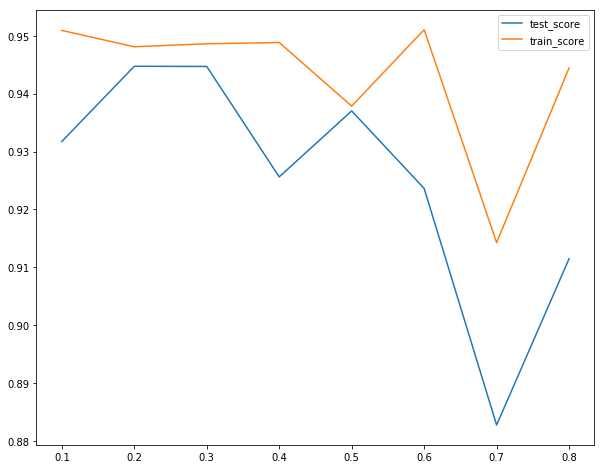

In [40]:
plt.plot(split_percents, test_scores, label="test_score")
plt.plot(split_percents, train_scores, label="train_score")
plt.legend(loc="best")

Кривые к друг другу ещё не сошлись, качество на валидации растёт, соответственно добавление данных действительно должно дать результат.

## Выводы

Получился хороший прототип для простой диагностики хронической почечной недостаточности, во всяком случае на данном этапе задача выглядит решаемой. Для того, чтобы её действительно решить, нужно больше данных.